In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize']=[10,7]

In [3]:
# show same images from the non-notebook example
import pycuda.autoinit
from pycuda import gpuarray
from matching import circle_image
import lagomorph as lm
width = 128
Jhost = np.concatenate(( circle_image(width, width, width*8//16, width//2, width//4)
                        ,circle_image(width, width, width*10//16, width//2, width//4)
                        #,circle_image(width, width, width*8//16, width//2, width*3//8)
                       )).astype(np.float32)
#Jhost = np.ascontiguousarray(Jhost[[1,0],...])
J = gpuarray.to_gpu(Jhost)

/home/4jh/miniconda3x86_64/envs/lagomorph/lib/python3.6/site-packages/skcuda/__init__.py:4: UserWarning: Module lagomorph was already imported from /home/4jh/miniconda3x86_64/envs/lagomorph/lib/python3.6/site-packages/lagomorph/__init__.py, but /home/4jh/git/lagomorph/examples is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


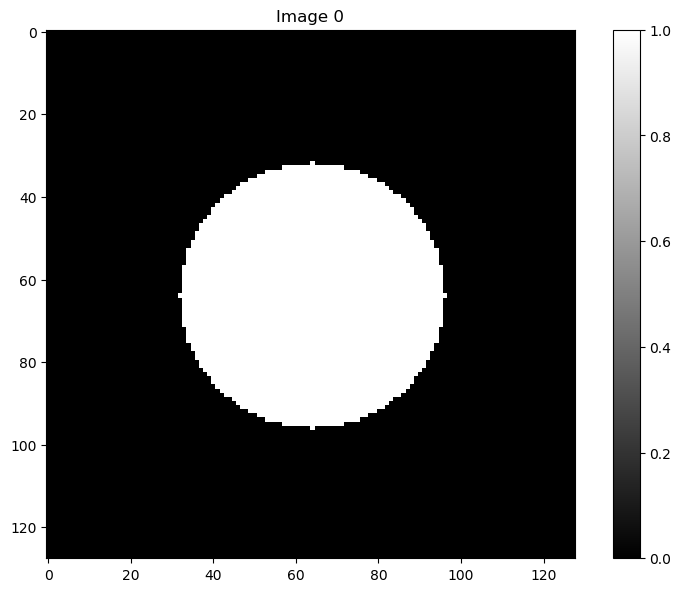

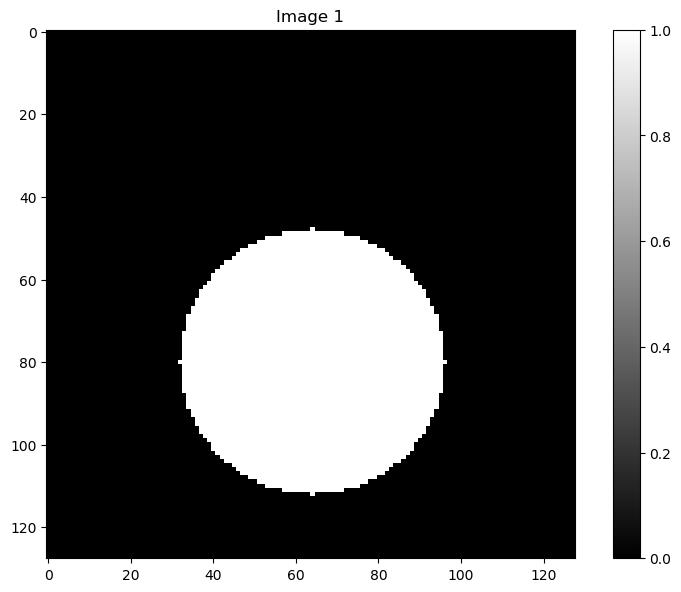

In [4]:
for n in range(J.shape[0]):
    plt.figure()
    plt.imshow(J[n,...].get().squeeze(), cmap='gray')
    plt.title(f'Image {n}')
    _=plt.colorbar()

In [5]:
fluid_params = np.asarray([1, .1, .01])*.1
atlas = lm.Atlas(J, fluid_params)
%time atlas.build(step_size=1, num_iters=20, constrain_mean_momentum_zero=1)#, callbacks=[])

Iteration   0 of 20 SSE=   1008.00 |m|^2=      0.00 E=   1008.00
Iteration   1 of 20 SSE=    975.68 |m|^2=      0.00 E=    975.68
Iteration   2 of 20 SSE=    937.38 |m|^2=      0.01 E=    937.38
Iteration   3 of 20 SSE=    880.96 |m|^2=      0.01 E=    880.97
Iteration   4 of 20 SSE=    824.65 |m|^2=      0.03 E=    824.68
Iteration   5 of 20 SSE=    773.06 |m|^2=      0.04 E=    773.10
Iteration   6 of 20 SSE=    716.89 |m|^2=      0.06 E=    716.95
Iteration   7 of 20 SSE=    665.07 |m|^2=      0.08 E=    665.15
Iteration   8 of 20 SSE=    623.63 |m|^2=      0.10 E=    623.73
Iteration   9 of 20 SSE=    577.41 |m|^2=      0.13 E=    577.53
Iteration  10 of 20 SSE=    530.97 |m|^2=      0.15 E=    531.12
Iteration  11 of 20 SSE=    495.63 |m|^2=      0.17 E=    495.80
Iteration  12 of 20 SSE=    460.50 |m|^2=      0.20 E=    460.69
Iteration  13 of 20 SSE=    425.90 |m|^2=      0.22 E=    426.11
Iteration  14 of 20 SSE=    403.39 |m|^2=      0.23 E=    403.62
Iteration  15 of 20 SSE= 

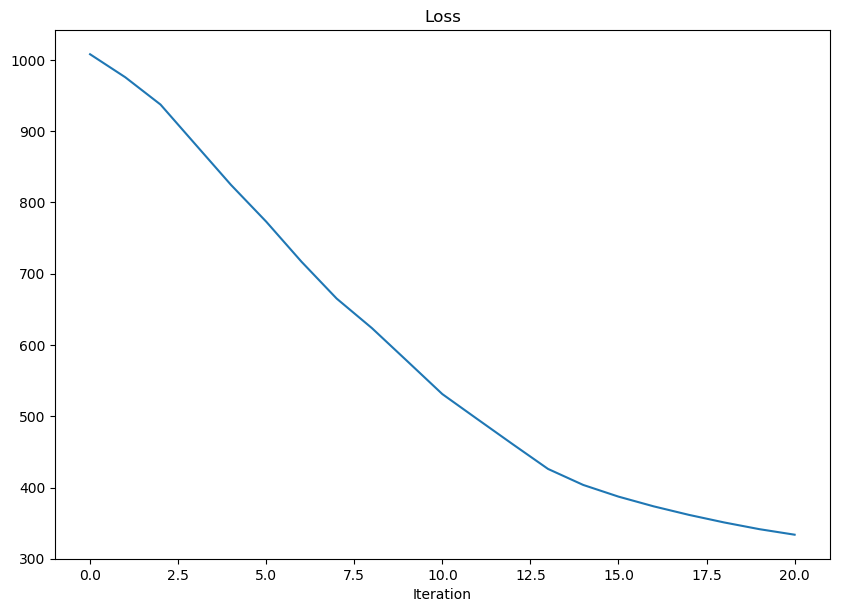

In [6]:
plt.plot(atlas.loss)
plt.xlabel('Iteration')
_=plt.title('Loss')

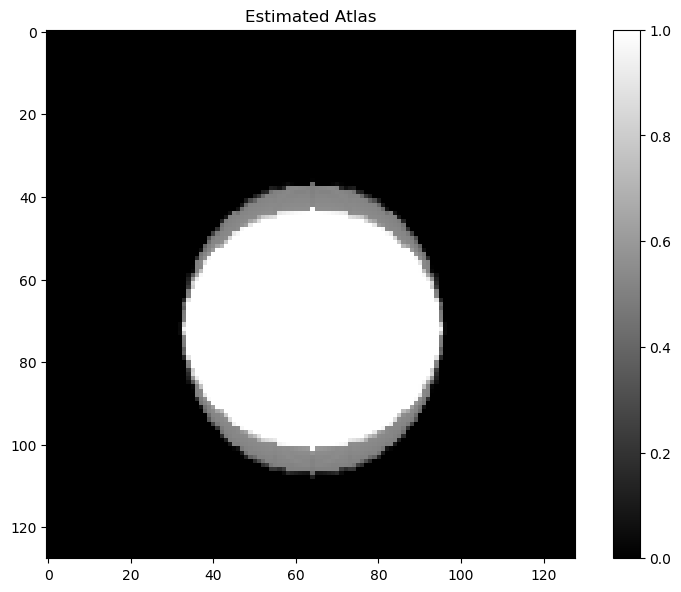

In [7]:
plt.imshow(atlas.base_image.get().squeeze(), cmap='gray')
plt.colorbar()
_=plt.title('Estimated Atlas')

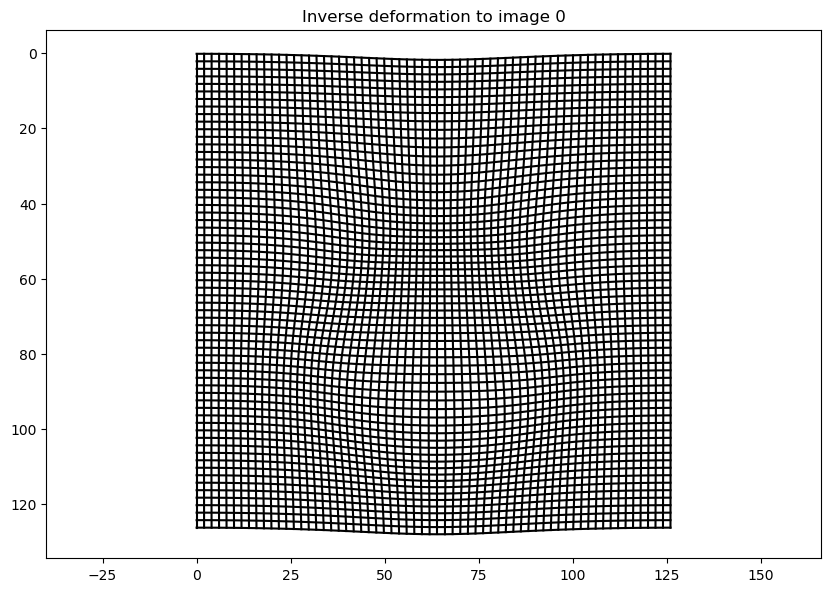

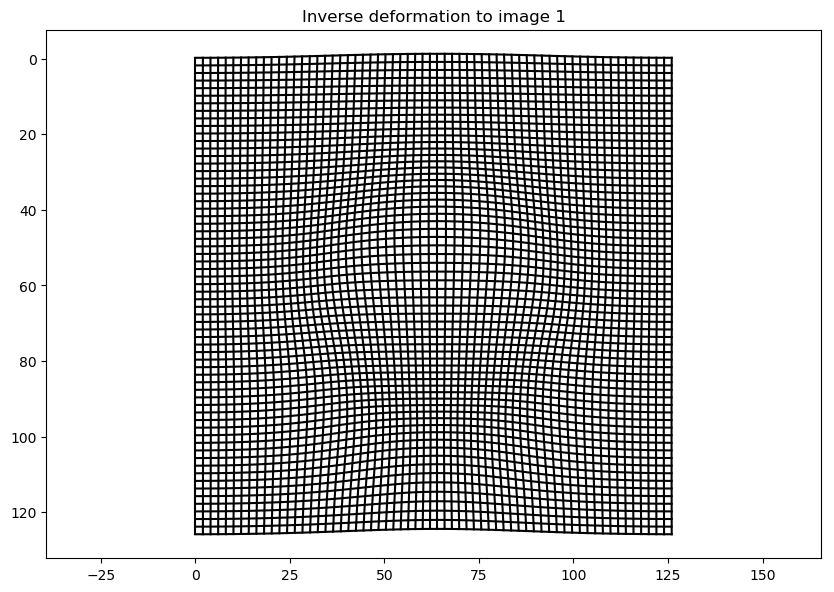

In [8]:
h = lm.expmap(atlas.m, atlas.metric)
for i in range(h.shape[0]):
    plt.figure()
    lm.gridplot(h.get()[[i],...])
    plt.title(f'Inverse deformation to image {i}')

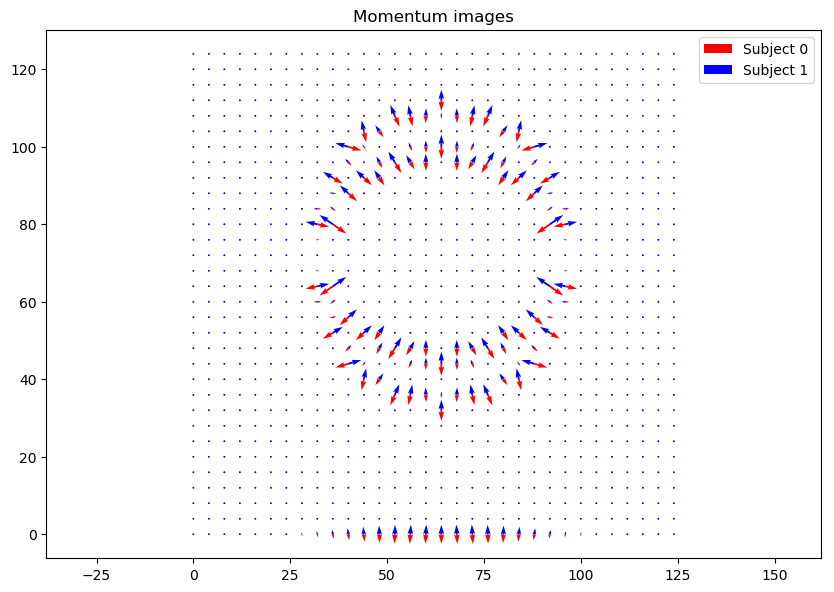

In [9]:
colors='rbg'
for i in range(atlas.m.shape[0]):
    lm.quiver(atlas.m.get()[[i],...]*100000, color=colors[i], label=f'Subject {i}')
    plt.title(f'Momentum images')
_=plt.legend()